In [ ]:
# install library 
!pip install pmdarima

In [ ]:
#import library
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
import pmdarima as pm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


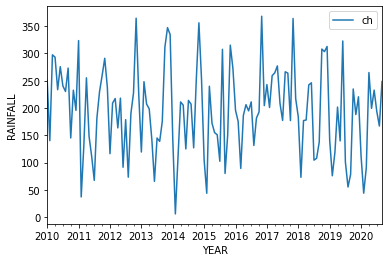

In [ ]:
# Load the data
data = pd.read_csv('ch2010-20.csv', engine='python', skipfooter=3)
# A bit of pre-processing to make it nicer
data['tgl']=pd.to_datetime(data['tgl'], format='%Y-%m-%d')
data.set_index(['tgl'], inplace=True)

# Plot the data
data.plot()
plt.ylabel('RAINFALL')
plt.xlabel('YEAR')
plt.show()


In [ ]:
# Splitting the data into train and test set
x=data.values
data_train = x[:105]
data_test = x[105:]
len(data_test)

24

In [ ]:
# Run the function with the specified arguments to find the best model

sarima_model = pm.auto_arima(data, seasonal = True, m=12,d=1,D=1,start_p=1,start_q=1,start_P=0,max_p=4,max_q=4,
                             trace=True,error_action='ignore',
                            suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.47 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1433.376, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1388.679, Time=0.21 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1340.057, Time=0.70 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=inf, Time=0.08 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=1.04 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=1.90 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1359.261, Time=0.30 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=3.31 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.22 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=inf, Time=0.50 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1372.424, Time=0.33 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=1343.869, Time=1.16 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.92 sec

Best model:  ARIMA(0,1,1)(0,1,1)[12]          
Total fit t

In [ ]:
# Fitting the model

sarima_model.fit(data_train)

ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 1, 1, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  105
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -528.939
Date:                            Thu, 15 Jul 2021   AIC                           1063.877
Time:                                    12:27:38   BIC                           1071.443
Sample:                                         0   HQIC                          1066.931
                                            - 105                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8811      0.076    -11.581      0.000      -1.030      -0.732
ma.S.L12      -0.9934      5.446     -0.182      0.855     -11.668       9.681
sigma2      4300.3089   2.31e+04      0.186      0.853   -4.11e+04    4.97e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 2.32
Prob(Q):                              0.63   Prob(JB):                         0.31
Heteroskedasticity (H):               0.61   Skew:                             0.13
Prob(H) (two-sided):                  0.17   Kurtosis:                         2.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Making the prediction based on the fitted SARIMA model

future_forecast = sarima_model.predict(n_periods=87)
date = pd.date_range(start="2018-10-1",end="2025-12-31", freq='M')

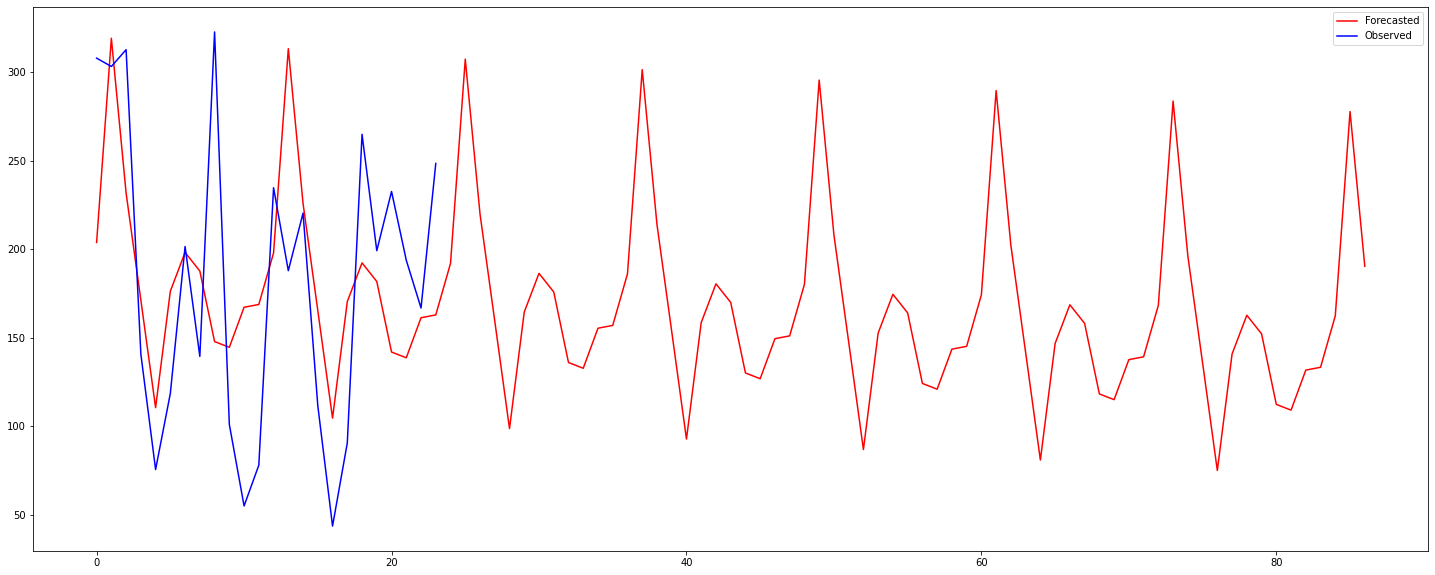

In [ ]:
plt.figure(figsize=(25,10))
plt.plot(future_forecast, color='red', label = 'Forecasted')
plt.plot(data_test,color='blue', label = 'Observed')
plt.legend()
plt.show()

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame(future_forecast, columns=["ch"], index=date)

,ch
2018-10-31,203.919043
2018-11-30,319.259771
2018-12-31,231.824602
2019-01-31,171.386195
2019-02-28,110.632225
2019-03-31,176.429926
2019-04-30,198.296411
2019-05-31,187.785228
2019-06-30,147.954503
2019-07-31,144.704027


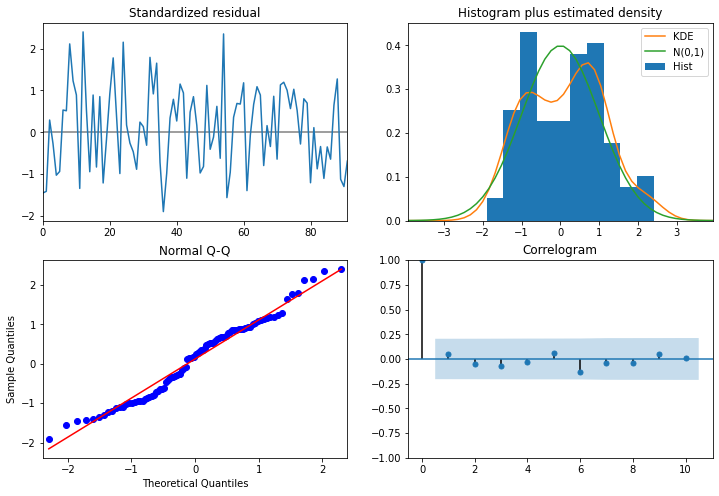

In [ ]:
# plotting the model diagnostics

sarima_model.plot_diagnostics(figsize=(12,8))
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

def MAPE(y_true, y_pred): 
    """
    %Error compares true value with predicted value. Lower the better. Use this along with rmse(). If the series has 
    outliers, compare/select model using MAPE instead of rmse()
    
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

rms = mean_squared_error(data_test,future_forecast[:24], squared=False)
mape = MAPE(data_test,future_forecast[:24])
print("rms :",rms)
print("MAPE :",mape,"%")

rms : 74.44560667030596
MAPE : 67.06160754924065 %
